# Vivino Wine Score Prediction

***

# Notebook 5: Modeling Wine Score Prediction

&nbsp;

**By: Annika Scholl**

**BrainStation Data Science**

This notebook presents a linear regression model for score prediction. The optimal model and hyperparameters are determined using GridSearch. Furthermore, coefficients are analysed to provide insights into the features with the highest influence on wine score prediction.

***

## Notebook Contents

1. [**Loading Data & Libraries**](#a1)<br>

2. [**Score Prediciton**](#a2)<br>
    2.1 [Linear Regression](#a2.1)<br>
    2.2 [Grid Search](#a2.2)<br>
    
3. [**Conclusion**](#a3)<br>

***

# Loading Data and Libraries <a id="a1"></a>

In [126]:
# import libraries
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.io as pio

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

In [127]:
# Figure settings matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams["figure.dpi"] = 300

In [128]:
# Figure settings plotly
px.defaults.width = 800
px.defaults.height = 600
px.defaults.template = "plotly_dark"

In [129]:
# Df clean 
df = pd.read_csv(f'data/data_clean.csv', index_col=0)

In [130]:
# Features for Recommendation
feature_final = pd.read_csv(f'data/feature_final.csv', index_col=0)

In [131]:
# DF with all features
df_complete = feature_final.iloc[:,5:].join(df, how="inner")

***

# Score Prediction <a id="a2"></a>

The linear regression model predicts the score. To ensure a valid score target, I will only use wines with more than 50 reviews. The target is the `avg_rating_wine_year` and the features comprise all numeric features, excluding the rating-related columns (`num_rating_wine_year`, `num_rating_wine`, `avg_rating_wine`), and the `wine_id`. Additionally, I am checking for columns that have only one unique value (variance = 0). If any are found, they will be dropped as they are unnecessary for my model. 

Furthermore, only French wine will be included in the score prediction as the country may have an influence on the scores. Dummy variables for other countries could be created in the future for further investigations of wine score prediction.

## Linear Regression

In [58]:
# Select rows with over 50 reviews and country France
cond_1 = df_complete['num_rating_wine_year'] > 50
cond_2 = df_complete['country'] == 'France'


features = df_complete[cond_1 & cond_2].select_dtypes(['int64', 'float64']).copy()

In [59]:
# drop rating related columns and wine_id
features.drop(columns = ['num_rating_wine_year', 'num_rating_wine', 'avg_rating_wine', 'wine_id'], inplace = True)

In [60]:
# delet columns with only one unique value
unique_counts = features.nunique()
col = unique_counts[unique_counts == 1].index

features.drop(columns=col, inplace = True)

In [61]:
# Check shape
features.shape

(16200, 490)

In [62]:
# Split X and y
X = features.drop(columns = 'avg_rating_wine_year')
y = features['avg_rating_wine_year']

In [63]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [64]:
# Instantiate scaler
ss = StandardScaler()

# Fit (train data!)
ss.fit(X_train)

# Transform (train and test data) 
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [65]:
#Instantiate model 
linreg = LinearRegression() 

#Fit model on training data 
linreg.fit(X_train_ss, y_train)

LinearRegression()

In [66]:
# Function to evaluate model
def model_evaluation(model, X_train, X_test):
    """

    Function to evaluate a linear regression model.

    Input:
    model: fitted model which should be evaluated
    X_train: X_train which was used for modeling
    X_test: X_test which was used for modeling

    Returns:
    Function prints R-squared, RMSE and MAE for train and test.

   """
    # make predictions on training set 
    y_train_pred = model.predict(X_train) 
    # make predictions on testing set 
    y_test_pred = model.predict(X_test)  

    # get r2 
    r2_train = r2_score(y_train, y_train_pred)*100
    print(f'R squared Train: {round(r2_train, 2)}%')
    r2_test = r2_score(y_test, y_test_pred)*100
    print(f'R squared Test: {round(r2_test, 2)}%')

    # get rmse 
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'RMSE Train: {round(rmse_train, 2)}')
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'RMSE Test: {round(rmse_test, 2)}')

    # get mae
    mae_train = mean_absolute_error(y_train, y_train_pred)
    print(f'MAE Train {round(mae_train, 2)}')
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f'MAE Test {round(mae_test, 2)}')


In [67]:
model_evaluation(linreg, X_train_ss, X_test_ss)

R squared Train: 62.11%
R squared Test: -3.8153531140407424e+17%
RMSE Train: 0.17
RMSE Test: 16692808.97
MAE Train 0.13
MAE Test 320460.88


In [77]:
print(f" Score mean: {features['avg_rating_wine_year'].mean()}")
print(f" Score median: {features['avg_rating_wine_year'].median()}")

 Score mean: 4.105253086419753
 Score median: 4.1


In [93]:
# Visualise
def visualise_scores(model):
    """

    Function to visualise Actual vs Predicted Wine Scores.

    Input:
    linear regression model

    Returns:
    Scattert plot of actual and predicted scores

    """
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, c='darkred')
    plt.xlabel('Actual Test Scores')
    plt.ylabel('Predicted Test Scores')
    plt.title('Actual vs Predicted Wine Scores')


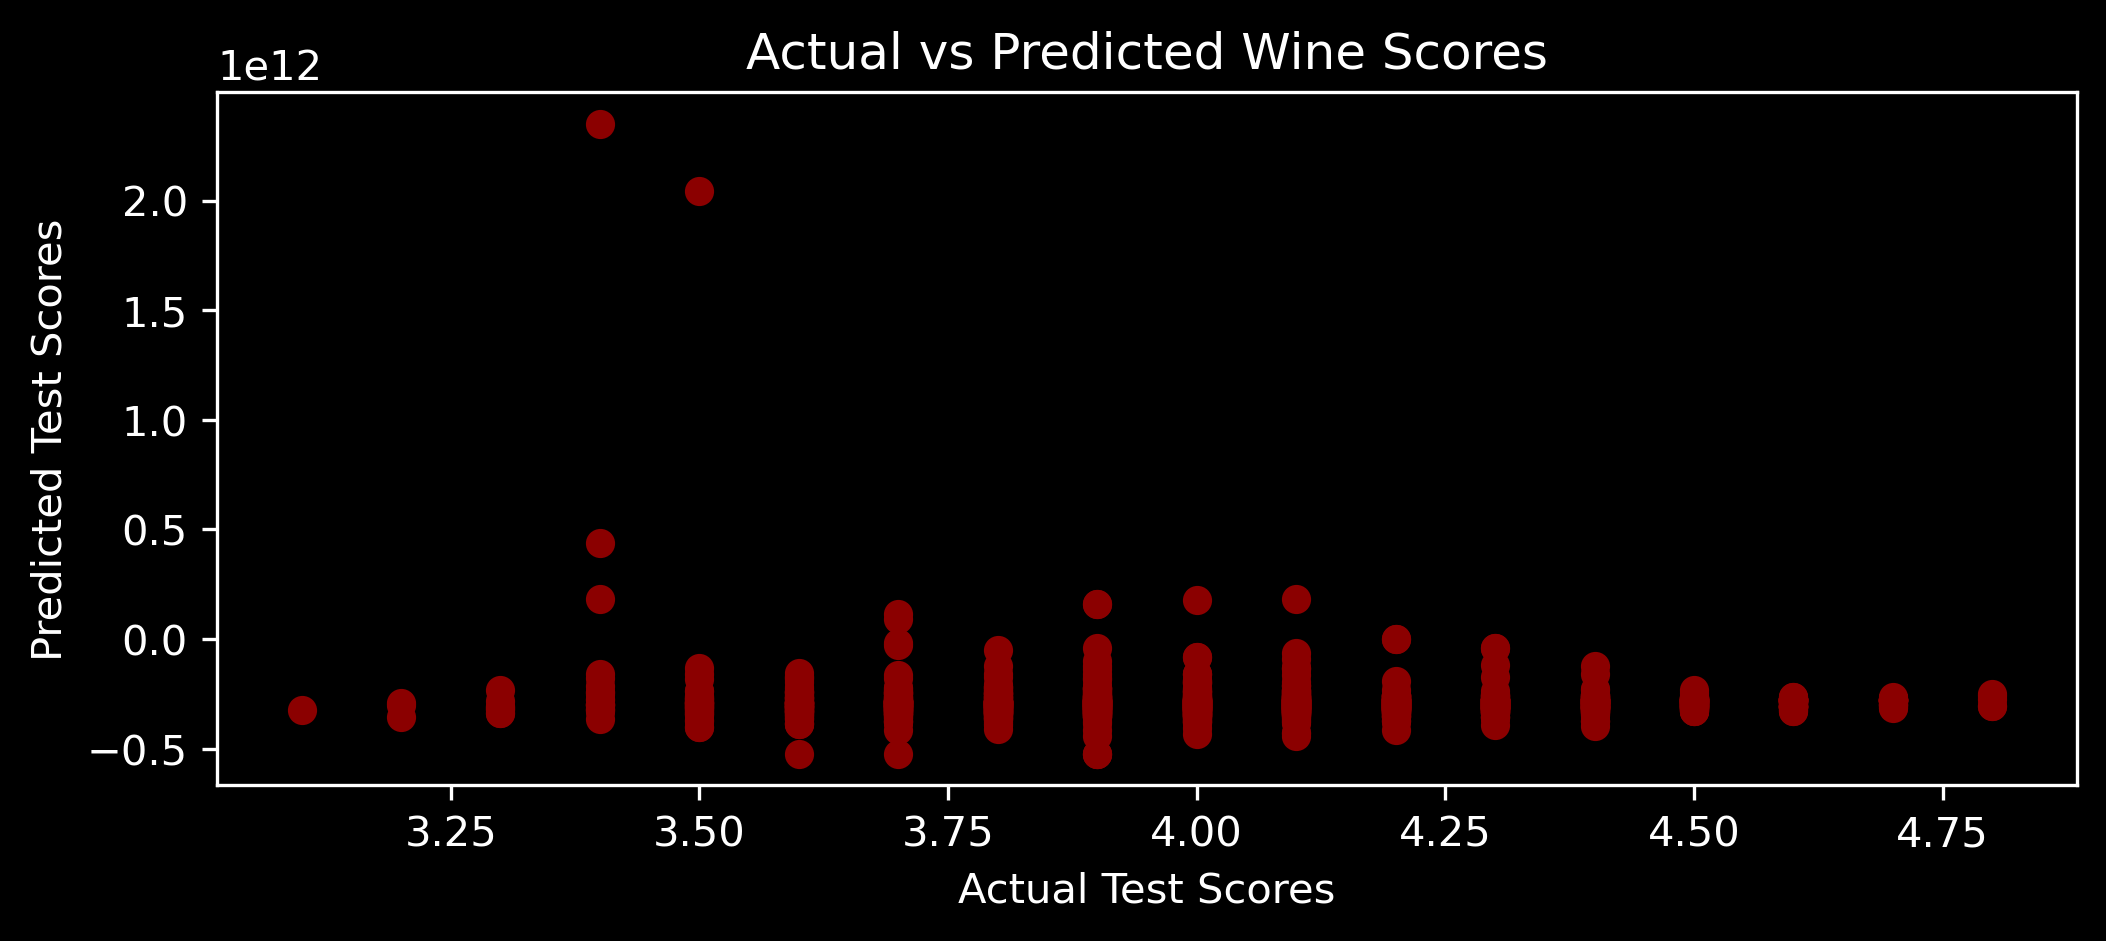

In [94]:
visualise_scores(linreg)

| Model | Parameter | Problem | R-squared Train | R-squared Test | RMSE Train | RMSE Test | MAE Train | MAE Test |
|:---------|--------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|
|  LinearRegression()  |  - |  Overfitting |  62.11%   |  0%   |  0.17  |  16692808.97   |  0.13  |  320460.88  |

**Key Findings:**

- The R-squared value is higher for the train set than for the test set. Moreover, the RMSE and MAE values are lower for the train set than for the test set. The linear regression model has difficulty capturing the variation in scores, as the scores only range from 3.2 to 4.8, with an average and median score of 4.1. This causes most predicted scores to be negative, resulting in a high RMSE and MAE for the test set. The disparities in R-squared, RMSE, and MAE between the training and testing data indicate overfitting. To tackle this problem, a grid search will be conducted using Lasso and Ridge linear regression to implement regularization and a penalty.

## Grid Search

In [86]:
# Instantiate pipeline
estimators = [('scaler', StandardScaler()),
                ('model',LinearRegression())]

pipe1 = Pipeline(estimators)

# Instantiate
param_grid1 = [

    # Linear Regression
    {
        'model': [LinearRegression()]
    },

    # Ridge
    {
        'model': [Ridge()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False],
        'model__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }, 

    # Lasso
    {
        'model': [Lasso()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False]
    }
]

In [ ]:
# Instantiate Gird Search
grid_search = GridSearchCV(
    estimator = pipe1,
    param_grid= param_grid1,
    cv=5,
    n_jobs=-1,
    verbose=5
)
# Fit Grid Search
fitted_grid1 = grid_search.fit(X_train, y_train)

In [143]:
model_evaluation(fitted_grid1, X_train, X_test)

R squared Train: 51.89%
R squared Test: 50.64%
RMSE Train: 0.19
RMSE Test: 0.19
MAE Train 0.15
MAE Test 0.15


In [144]:
def gs_results(model):
    """

    Function to display the top 10 cross-validation scores.

    Input:
    model: fitted grid search model

    Returns:
    Displays dataframe of the top 10 cv scores with parameters and std.

   """

    #set dataframes with expanded columns to view full parameters
    pd.set_option('display.max_colwidth', None) 

    # Show results in a dataframe
    gs_results_df = pd.DataFrame(model.cv_results_).sort_values('mean_test_score', ascending=False) 
    gs_results = gs_results_df[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False) 
    print("GridSearch 1 Cross Validation Results")
    display(gs_results.head(10)) 

In [145]:
gs_results(fitted_grid1)

GridSearch 1 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
107,1,"{'model': Lasso(alpha=0.01), 'model__alpha': 0.01, 'model__fit_intercept': True}",0.511048,0.003774
105,2,"{'model': Lasso(alpha=0.01), 'model__alpha': 0.1, 'model__fit_intercept': True}",0.117231,0.006577
97,3,"{'model': Lasso(alpha=0.01), 'model__alpha': 200, 'model__fit_intercept': True}",-0.000867,0.001001
103,3,"{'model': Lasso(alpha=0.01), 'model__alpha': 1, 'model__fit_intercept': True}",-0.000867,0.001001
101,3,"{'model': Lasso(alpha=0.01), 'model__alpha': 10, 'model__fit_intercept': True}",-0.000867,0.001001
99,3,"{'model': Lasso(alpha=0.01), 'model__alpha': 100, 'model__fit_intercept': True}",-0.000867,0.001001
109,7,"{'model': Lasso(alpha=0.01), 'model__alpha': 0.001, 'model__fit_intercept': True}",-0.404532,1.843394
6,8,"{'model': Ridge(), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'saga'}",-1.064271,3.006519
5,9,"{'model': Ridge(), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'sag'}",-1.070269,3.020045
4,10,"{'model': Ridge(), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'sparse_cg'}",-1.070916,3.024909


**Note:** The `mean_test_score` and `std_test_score` are the average validation scores from the cross-validation not from the test set. 

In [146]:
# Putting coefficients inside a dataframe
coef = pd.DataFrame({'Feature_name' : X_train.columns, 
              'Beta_Coefficients' : fitted_grid1.best_estimator_.named_steps.model.coef_})

coef.sort_values(by='Beta_Coefficients').head(10)

,Feature_name,Beta_Coefficients
16,earth_earthy,-0.021044
468,Blue cheese,-0.020207
469,Cured Meat,-0.011443
141,microbio_cheese,-0.007215
69,black_fruit_blackberry,-0.005485
76,black_fruit_plum,-0.005279
70,black_fruit_blackcurrant,-0.004835
30,red_fruit_cherry,-0.004322
476,Pasta,-0.004242
79,vegetal_green bell pepper,-0.003981


In [147]:
# Look where coefficient are equal to 0
coef[coef['Beta_Coefficients']==0]

,Feature_name,Beta_Coefficients
1,group_citrus_fruit,-0.0
2,group_dried_fruit,0.0
5,group_microbio,-0.0
7,group_oak,0.0
8,group_red_fruit,-0.0
...,...,...
480,Veal,-0.0
483,volume,-0.0
485,taste_intensity,0.0
486,taste_tannin,-0.0


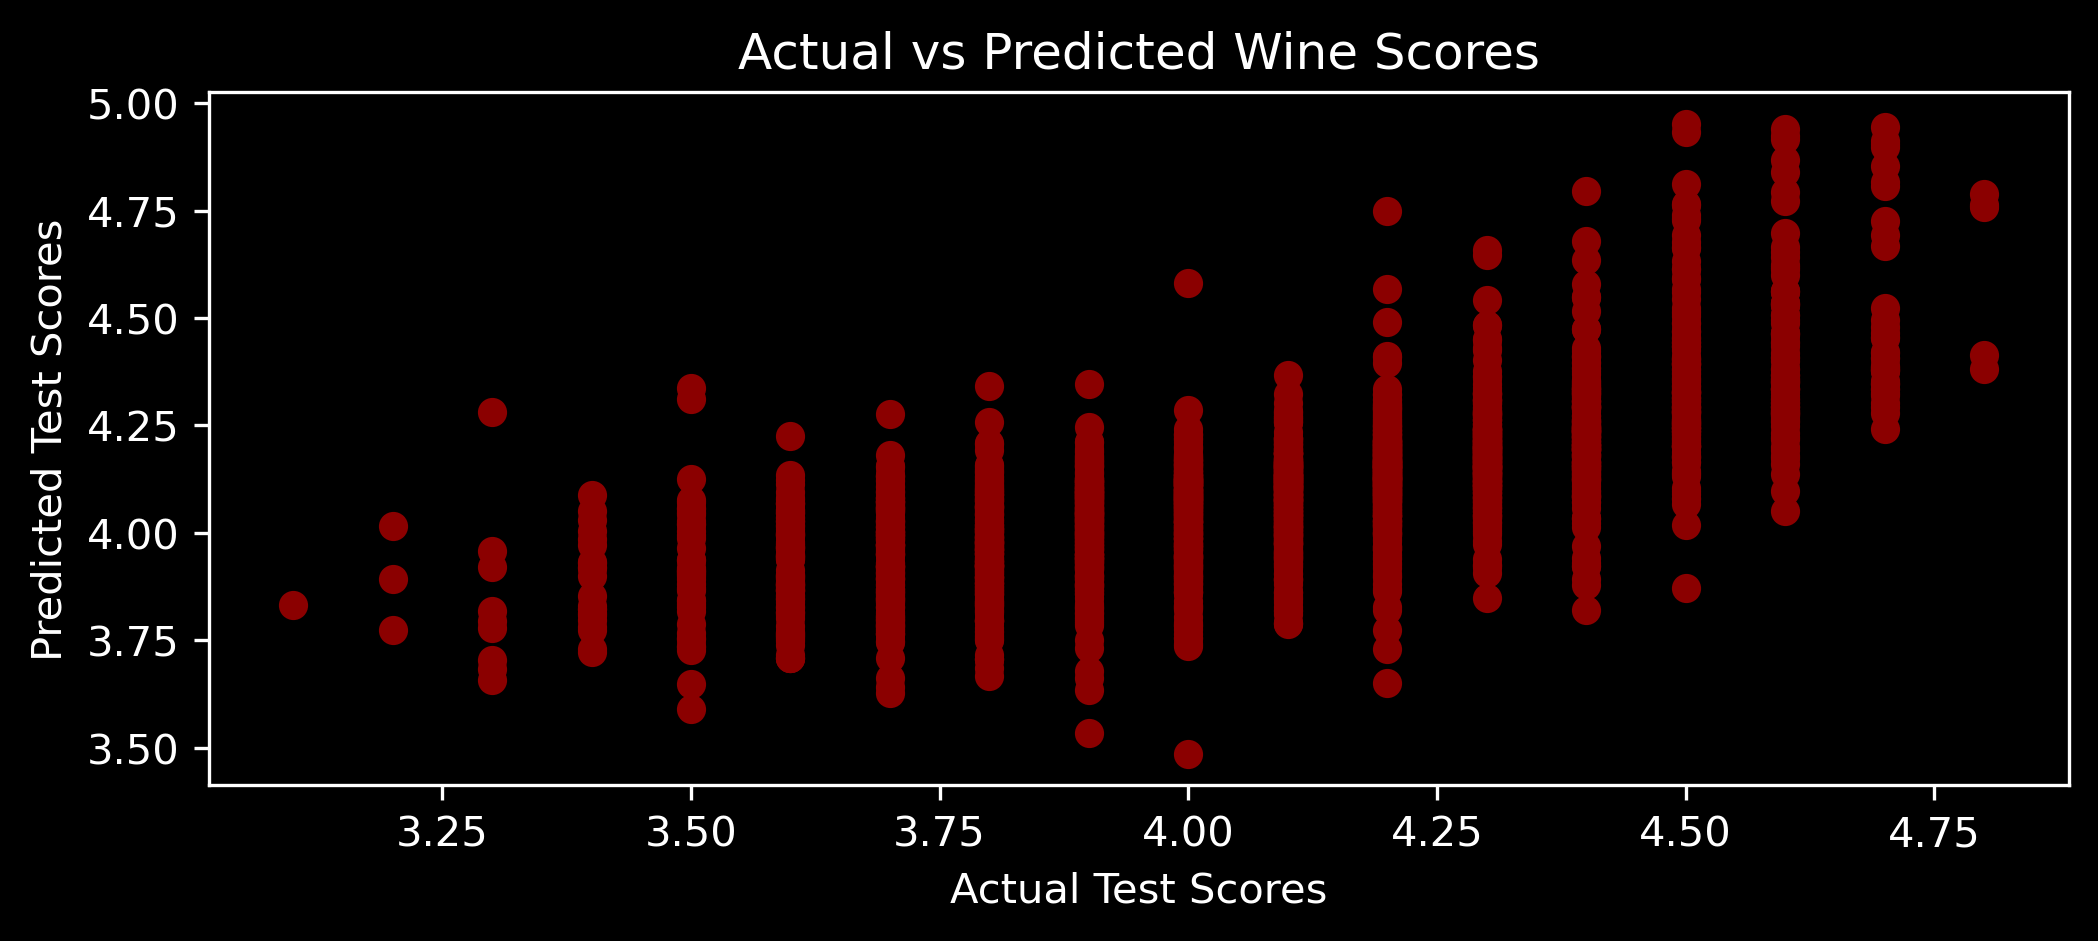

In [148]:
visualise_scores(fitted_grid1)

| Model | Parameter | Problem | R-squared Train | Avg. R-squared Validation | R-squared Test | RMSE Train | RMSE Test | MAE Train | MAE Test |
|:---------|--------:|---------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|
|  LinearRegression()  |  - |  Overfitting |  62.11%    |  -   |  0%  |  0.17  |  16692808.97   |  0.13  |  320460.88   |
|  GridSearch 1: Lasso   |  alpha=0.01, fit_intercept= True   |  Too many features   |  51.89%   |  51.10%   |  50.64%  |  0.19  |  0.19   |  0.15   |  0.15   |

**Key Findings:**
- The first grid search result in a Lasso linear regression with an alpha of 0.01. The training and average validation R-squared values are now closer and RMSE and MAE are the same for train and test, indicating that the model is less overfitted. Furthermore, the penalty results in many features having a coefficient of 0. Therefore, I will drop those features and perform another grid search.
- The graph also shows that the predicted and actual scores are more in a line and in the range between 3.5 and 5.0 resulting in the lower RMSE and MAE.


In [149]:
# Drop columns with coefficient = 0
cols = coef[coef['Beta_Coefficients']==0]['Feature_name'].values
features_selected = features.drop(columns = cols)
features_selected.shape

(16200, 49)

In [150]:
# Split X and y
X = features_selected.drop(columns = 'avg_rating_wine_year')
y = features_selected['avg_rating_wine_year']

In [151]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [104]:
# Instantiate pipeline
estimators = [('scaler', StandardScaler()),
                ('model',LinearRegression())]

pipe2 = Pipeline(estimators)

# Instantiate
param_grid2 = [

    # Linear Regression
    {
        'model': [LinearRegression()]
    },

    # Ridge
    {
        'model': [Ridge()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False],
        'model__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }, 

    # Lasso
    {
        'model': [Lasso()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False]
    }
]

In [ ]:
# Instantiate Gird Search
grid_search2 = GridSearchCV(
    estimator = pipe2,
    param_grid= param_grid2,
    cv=5,
    n_jobs=-1,
    verbose=5
)
# Fit Grid Search
fitted_grid2 = grid_search2.fit(X_train, y_train)

In [106]:
# Best Estimator of GridSearch
print(fitted_grid2.best_params_)

{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'svd'}


In [107]:
model_evaluation(fitted_grid2, X_train, X_test)

R squared Train: 55.36%
R squared Test: 52.42%
RMSE Train: 0.18
RMSE Test: 0.19
MAE Train 0.14
MAE Test 0.14


In [108]:
gs_results(fitted_grid2)

GridSearch 1 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
1,1,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543675,0.010372
2,2,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543675,0.010372
5,3,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'sag'}",0.543670,0.010378
6,4,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'saga'}",0.543670,0.010352
4,5,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'sparse_cg'}",0.543633,0.010337
17,6,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 100, 'model__fit_intercept': True, 'model__solver': 'sag'}",0.543627,0.010470
3,7,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'lsqr'}",0.543611,0.010295
13,8,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 100, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543609,0.010492
14,9,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 100, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543609,0.010492
18,10,"{'model': Ridge(alpha=200, solver='svd'), 'model__alpha': 100, 'model__fit_intercept': True, 'model__solver': 'saga'}",0.543604,0.010476


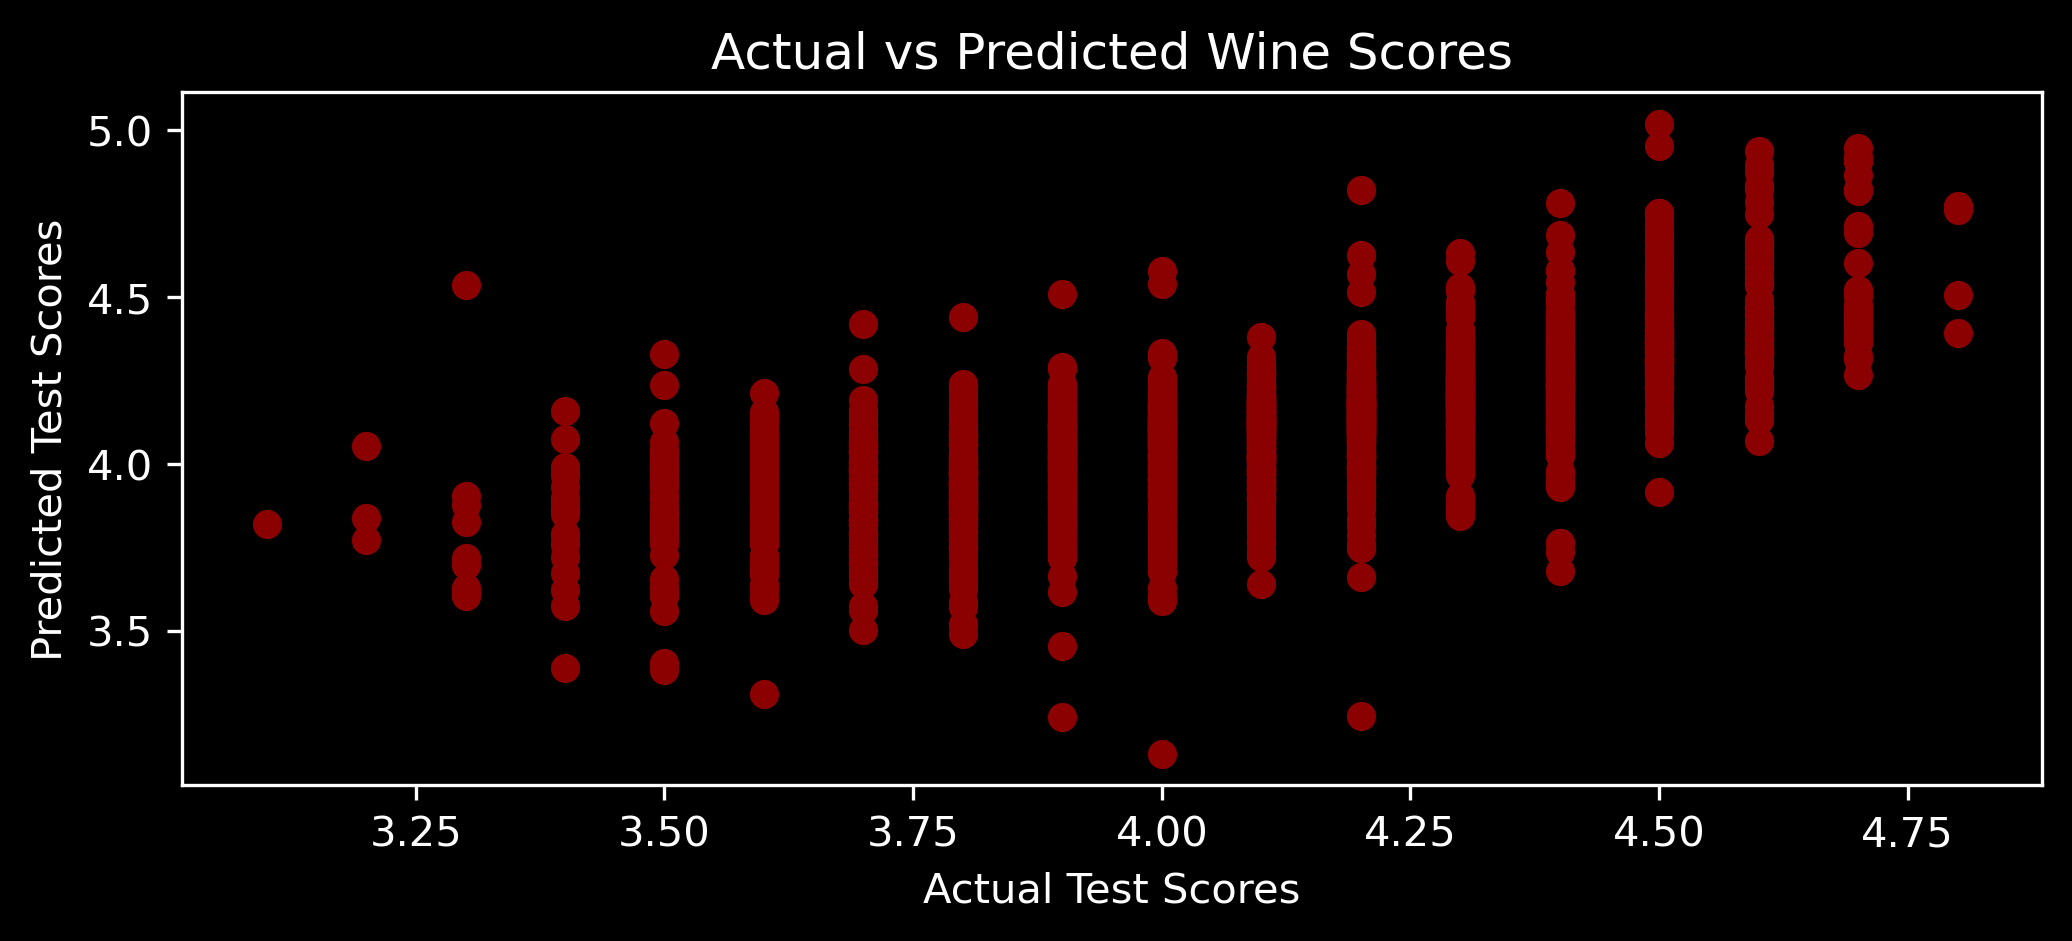

In [109]:
visualise_scores(fitted_grid2)

| Model | Parameter | Problem | R-squared Train | Avg. R-squared Validation | R-squared Test | RMSE Train | RMSE Test | MAE Train | MAE Test |
|:---------|--------:|---------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|
|  LinearRegression()  |  - |  Overfitting |  62.11%    |  -   |  0%  |  0.17  |  16692808.97   |  0.13  |  320460.88   |
|  GridSearch 1: Lasso   |  alpha=0.01, fit_intercept= True   |  Too many features   |  51.89%   |  51.10%   |  50.64%  |  0.19  |  0.19   |  0.15   |  0.15   |
|  GridSearch 2: Ridge   |  alpha=200, solver='svd', fit_intercept= True  |  alpha is at the end of the range   |  55.36%  |  54.368%   |  52.42%   |  0.18   |  0.19   |  0.14   |  0.14   |

**Key Findings:**
- The second grid search resulted in a Ridge linear regression with an alpha of 200 and an even higher average validation R-squared. However, the alpha value is at the upper end of the range. Therefore, I will perform another grid search with a wider range of alpha values.

In [110]:
# Instantiate pipeline
estimators = [('scaler', StandardScaler()),
                ('model',LinearRegression())]

pipe3 = Pipeline(estimators)

# Instantiate
param_grid3 = [

    # Ridge
    {
        'model': [Ridge()],
        'model__alpha': [500, 400, 300, 200],
        'model__fit_intercept': [True, False],
        'model__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }
]

In [ ]:
# Instantiate Gird Search
grid_search3 = GridSearchCV(
    estimator = pipe3,
    param_grid= param_grid3,
    cv=5,
    n_jobs=-1,
    verbose=5
)
# Fit Grid Search
fitted_grid3 = grid_search3.fit(X_train, y_train)

In [112]:
# Best Estimator of GridSearch
print(fitted_grid3.best_params_)


{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 300, 'model__fit_intercept': True, 'model__solver': 'svd'}


In [113]:
model_evaluation(fitted_grid3, X_train, X_test)

R squared Train: 55.35%
R squared Test: 52.44%
RMSE Train: 0.18
RMSE Test: 0.19
MAE Train 0.14
MAE Test 0.14


In [114]:
gs_results(fitted_grid3)

GridSearch 1 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
24,1,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 300, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543700,0.010259
25,2,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 300, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543700,0.010259
16,3,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 400, 'model__fit_intercept': True, 'model__solver': 'sag'}",0.543695,0.010150
29,4,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 300, 'model__fit_intercept': True, 'model__solver': 'saga'}",0.543694,0.010249
12,5,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 400, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543689,0.010151
13,6,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 400, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543689,0.010151
17,7,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 400, 'model__fit_intercept': True, 'model__solver': 'saga'}",0.543685,0.010142
28,8,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 300, 'model__fit_intercept': True, 'model__solver': 'sag'}",0.543680,0.010239
36,9,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543675,0.010372
37,10,"{'model': Ridge(alpha=300, solver='svd'), 'model__alpha': 200, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543675,0.010372


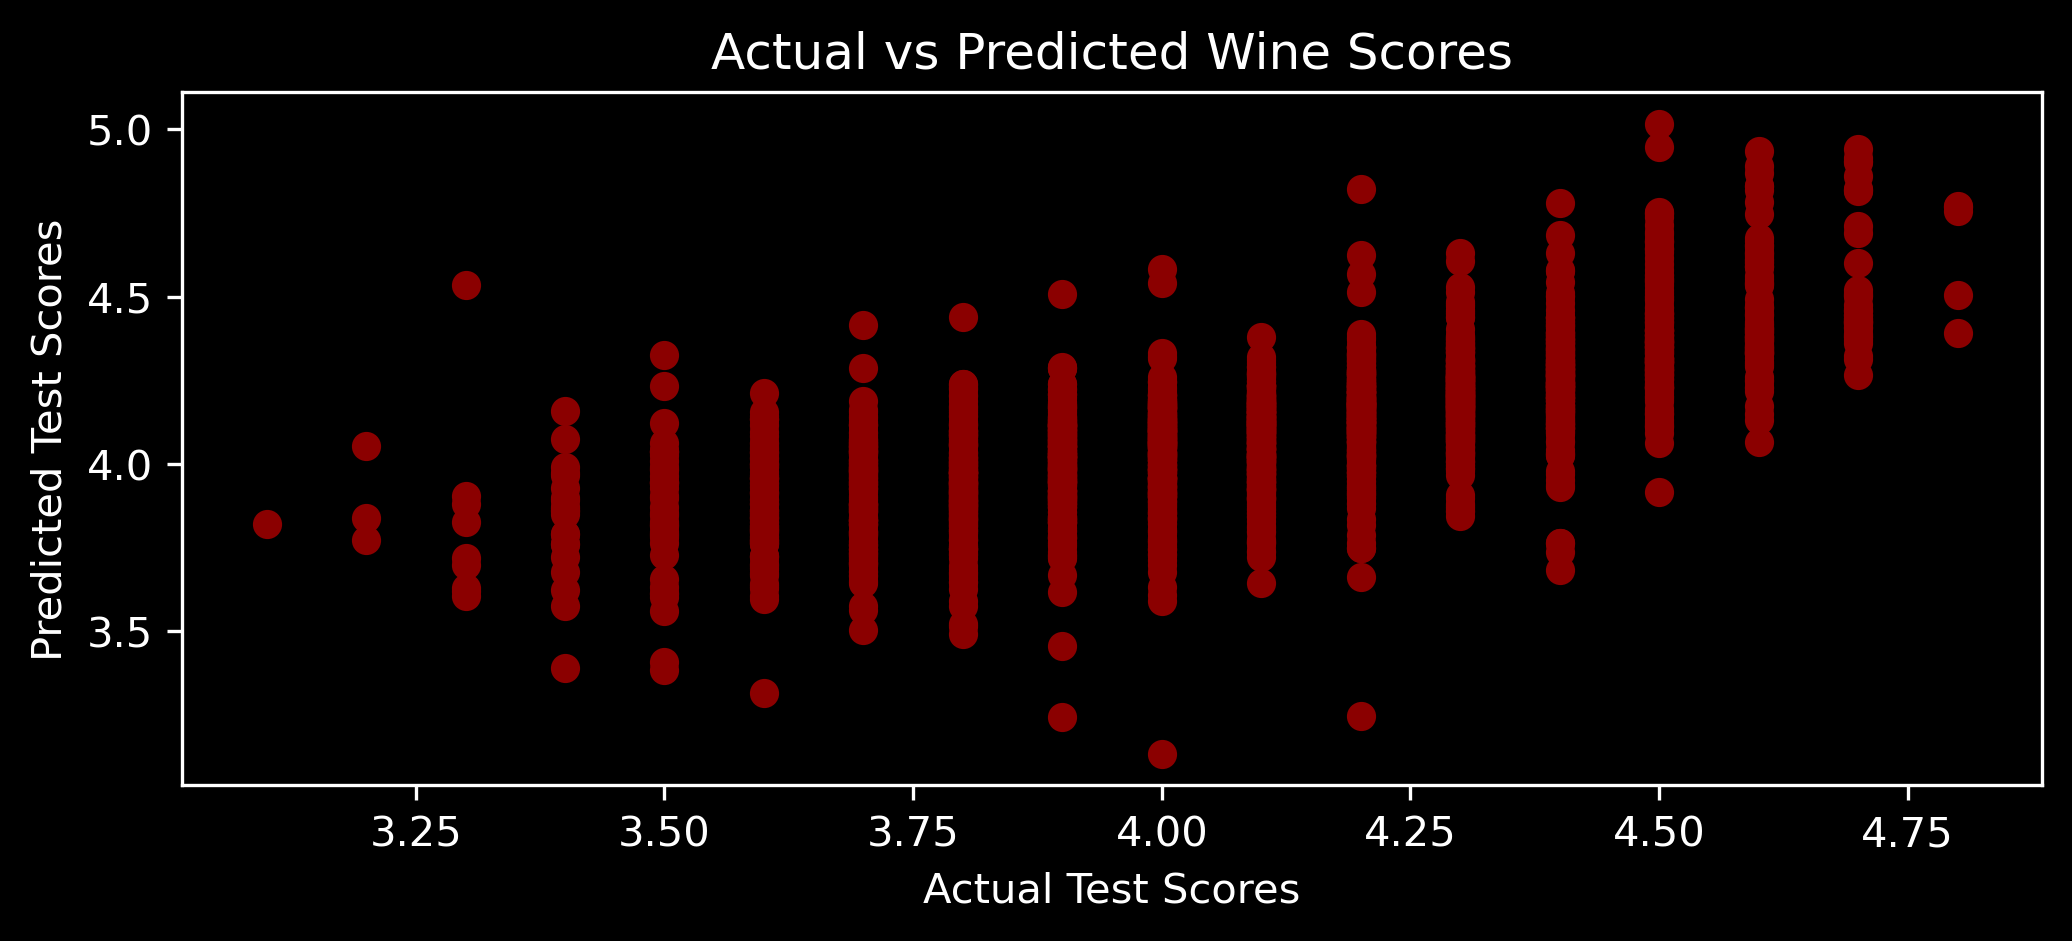

In [115]:
visualise_scores(fitted_grid3)

| Model | Parameter | Problem | R-squared Train | Avg. R-squared Validation | R-squared Test | RMSE Train | RMSE Test | MAE Train | MAE Test |
|:---------|--------:|---------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|
|  LinearRegression()  |  - |  Overfitting |  62.11%    |  -   |  0%  |  0.17  |  16692808.97   |  0.13  |  320460.88   |
|  GridSearch 1: Lasso   |  alpha=0.01, fit_intercept= True   |  Too many features   |  51.89%   |  51.10%   |  50.64%  |  0.19  |  0.19   |  0.15   |  0.15   |
|  GridSearch 2: Ridge   |  alpha=200, solver='svd', fit_intercept= True  |  alpha is at the end of the range   |  55.36%  |  54.368%   |  52.42%   |  0.18   |  0.19   |  0.14   |  0.14   |
|  GridSearch 3: Ridge   |  alpha=300, solver='svd', fit_intercept= True  |  -   |  55.35%  |  54.37%  |  52.44%  |  0.18   |  0.19   |  0.14   |  0.14   |


**Key Findings:**

- The third grid search produced a Ridge linear regression with an alpha of 300. The average validation R-squared is slightly higher than before at 54.37%, and the R-squared of the training set is slightly lower at 55.35%. However, the model evaluation is based on cross-validation, so the third grid search yielded the best model. Therefore, I will analyse the coefficients below. 

In [124]:
# Putting coefficients inside a dataframe
coef = pd.DataFrame({'Feature_name' : X_train.columns, 
              'Beta_Coefficients' : fitted_grid3.best_estimator_.named_steps.model.coef_})

coef.sort_values(by='Beta_Coefficients').head(10)


,Feature_name,Beta_Coefficients
5,earth_earthy,-0.027464
39,Blue cheese,-0.026996
40,Cured Meat,-0.019429
19,black_fruit_blackcurrant,-0.016250
29,microbio_cheese,-0.015639
20,black_fruit_plum,-0.014132
21,vegetal_green bell pepper,-0.013876
18,black_fruit_blackberry,-0.012585
0,group_black_fruit,-0.011238
4,group_tree_fruit,-0.009316


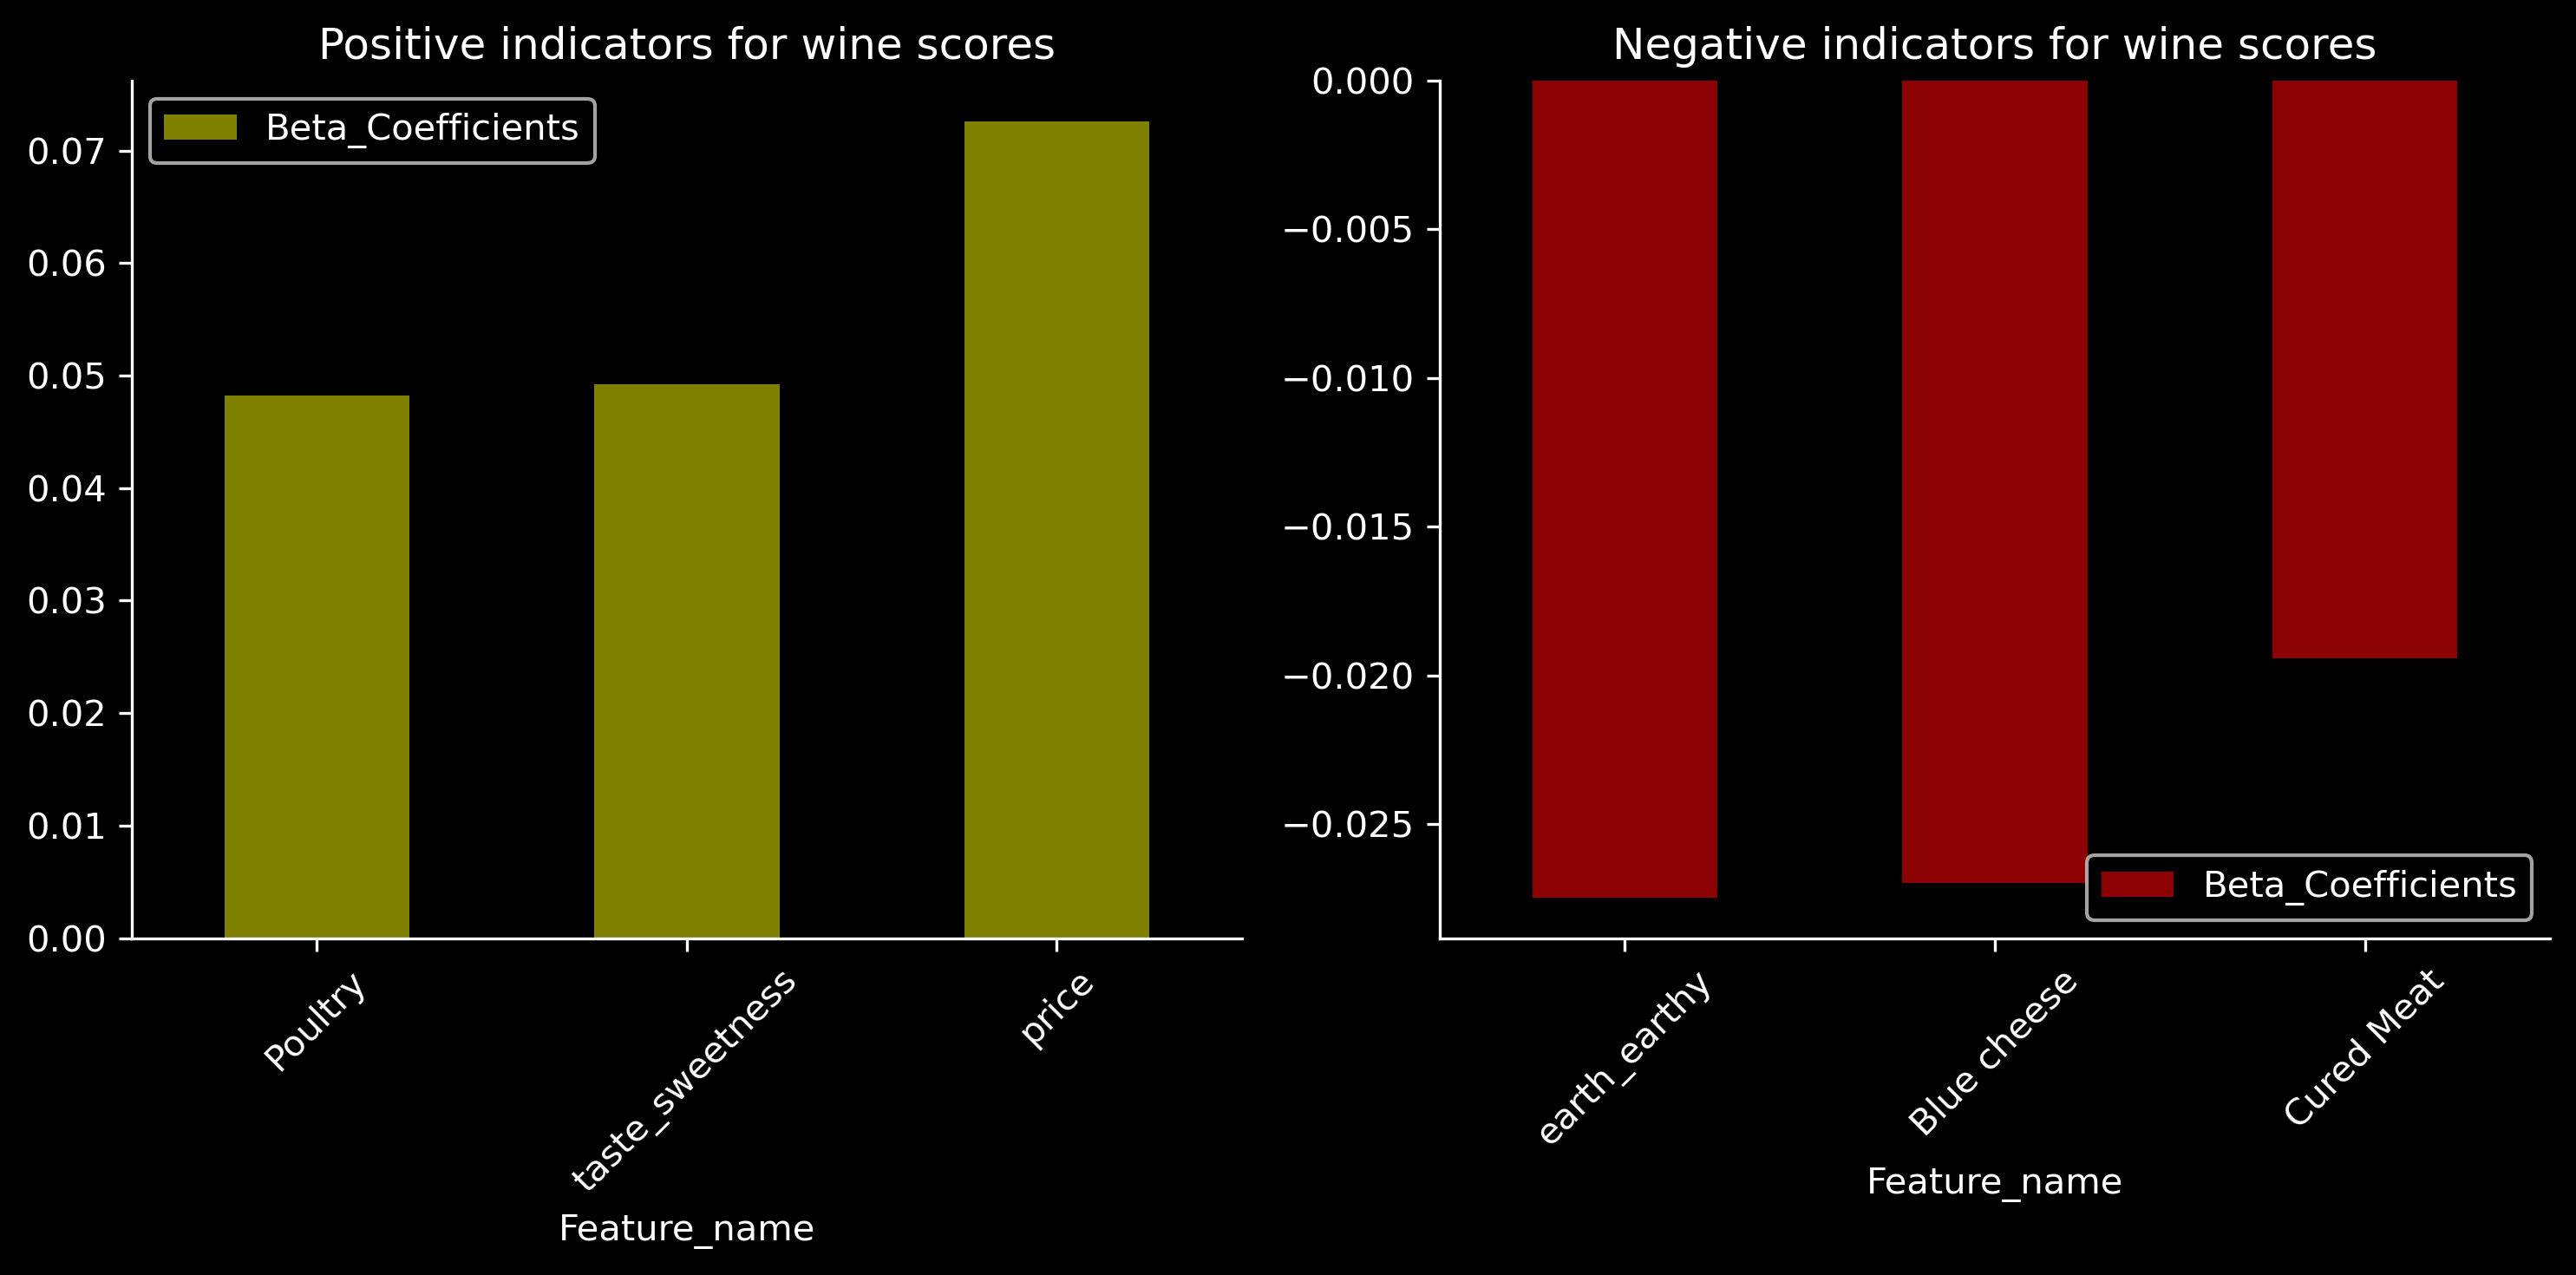

In [125]:
# Plot positive and negative coefficients
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

# largest coefficient 
coef.sort_values(by='Beta_Coefficients').head(3).set_index("Feature_name").plot(kind="bar", rot=45, ax=axs[1], color="darkred")
axs[0].set_title("Positive indicators for wine scores")

# smallest coefficient 
coef.sort_values(by='Beta_Coefficients').tail(3).set_index("Feature_name").plot(kind="bar", rot=45, ax=axs[0], color="olive")
axs[1].set_title("Negative indicators for wine scores")

sns.despine()
plt.tight_layout()
plt.show()

**Key Findings**:

Positive Indicators:
- `price`: Price is the strongest positive indicator. This means that a one unit increase in price is predicted to increase the score by 0.07. This could be due to the fact that a more expensive wine has a better quality and therefore a higher score.
- `taste_sweetness`: The sweetness is another positive indicator where the review score is expected to increase when the sweetness is higher.


Negative Indicators:
- `earth_earthy`: The subflavor earthy of the flavor group earth is a negative indicator of the review score. For an increase in the earthy subflavor the review is predicted to decrease by 0.03.
- `Blue cheese` and `Cured Meat`: If the wine goes well with blue cheese or cured meat it is a negative indicator.


## Add on: without scaler

Since I have added the scaler in the previous grid searches, I am doing a grid search without scaling.

In [118]:
# Instantiate pipeline
estimators = [('model',LinearRegression())]

pipe4 = Pipeline(estimators)

# Instantiate
param_grid4 = [

    # Linear Regression
    {
        'model': [LinearRegression()]
    },

    # Ridge
    {
        'model': [Ridge()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False],
        'model__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }, 

    # Lasso
    {
        'model': [Lasso()],
        'model__alpha': [200, 100, 10, 1,0.1,0.01,0.001,0.0001],
        'model__fit_intercept': [True, False],
        'model__max_iter': [3000]
    }
]

In [ ]:
# Instantiate Gird Search
grid_search4 = GridSearchCV(
    estimator = pipe4,
    param_grid= param_grid4,
    cv=5,
    n_jobs=-1,
    verbose=5
)
# Fit Grid Search
fitted_grid4 = grid_search4.fit(X_train, y_train)

In [120]:
# Best Estimator of GridSearch
print(fitted_grid4.best_params_)

{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.01, 'model__fit_intercept': True, 'model__solver': 'svd'}


In [121]:
model_evaluation(fitted_grid4, X_train, X_test)

R squared Train: 55.21%
R squared Test: 52.44%
RMSE Train: 0.18
RMSE Test: 0.19
MAE Train 0.14
MAE Test 0.14


In [122]:
gs_results(fitted_grid4)

GridSearch 1 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
61,1,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.01, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.543875,0.008523
62,2,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.01, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.543875,0.008523
0,3,{'model': LinearRegression()},0.543498,0.010619
73,4,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.001, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.542999,0.010146
74,5,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.001, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.542999,0.010146
85,6,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.542863,0.010633
86,7,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.542863,0.010633
50,8,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.1, 'model__fit_intercept': True, 'model__solver': 'cholesky'}",0.540670,0.006969
49,9,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.1, 'model__fit_intercept': True, 'model__solver': 'svd'}",0.540670,0.006969
67,10,"{'model': Ridge(alpha=0.01, solver='svd'), 'model__alpha': 0.01, 'model__fit_intercept': False, 'model__solver': 'svd'}",0.538755,0.010269


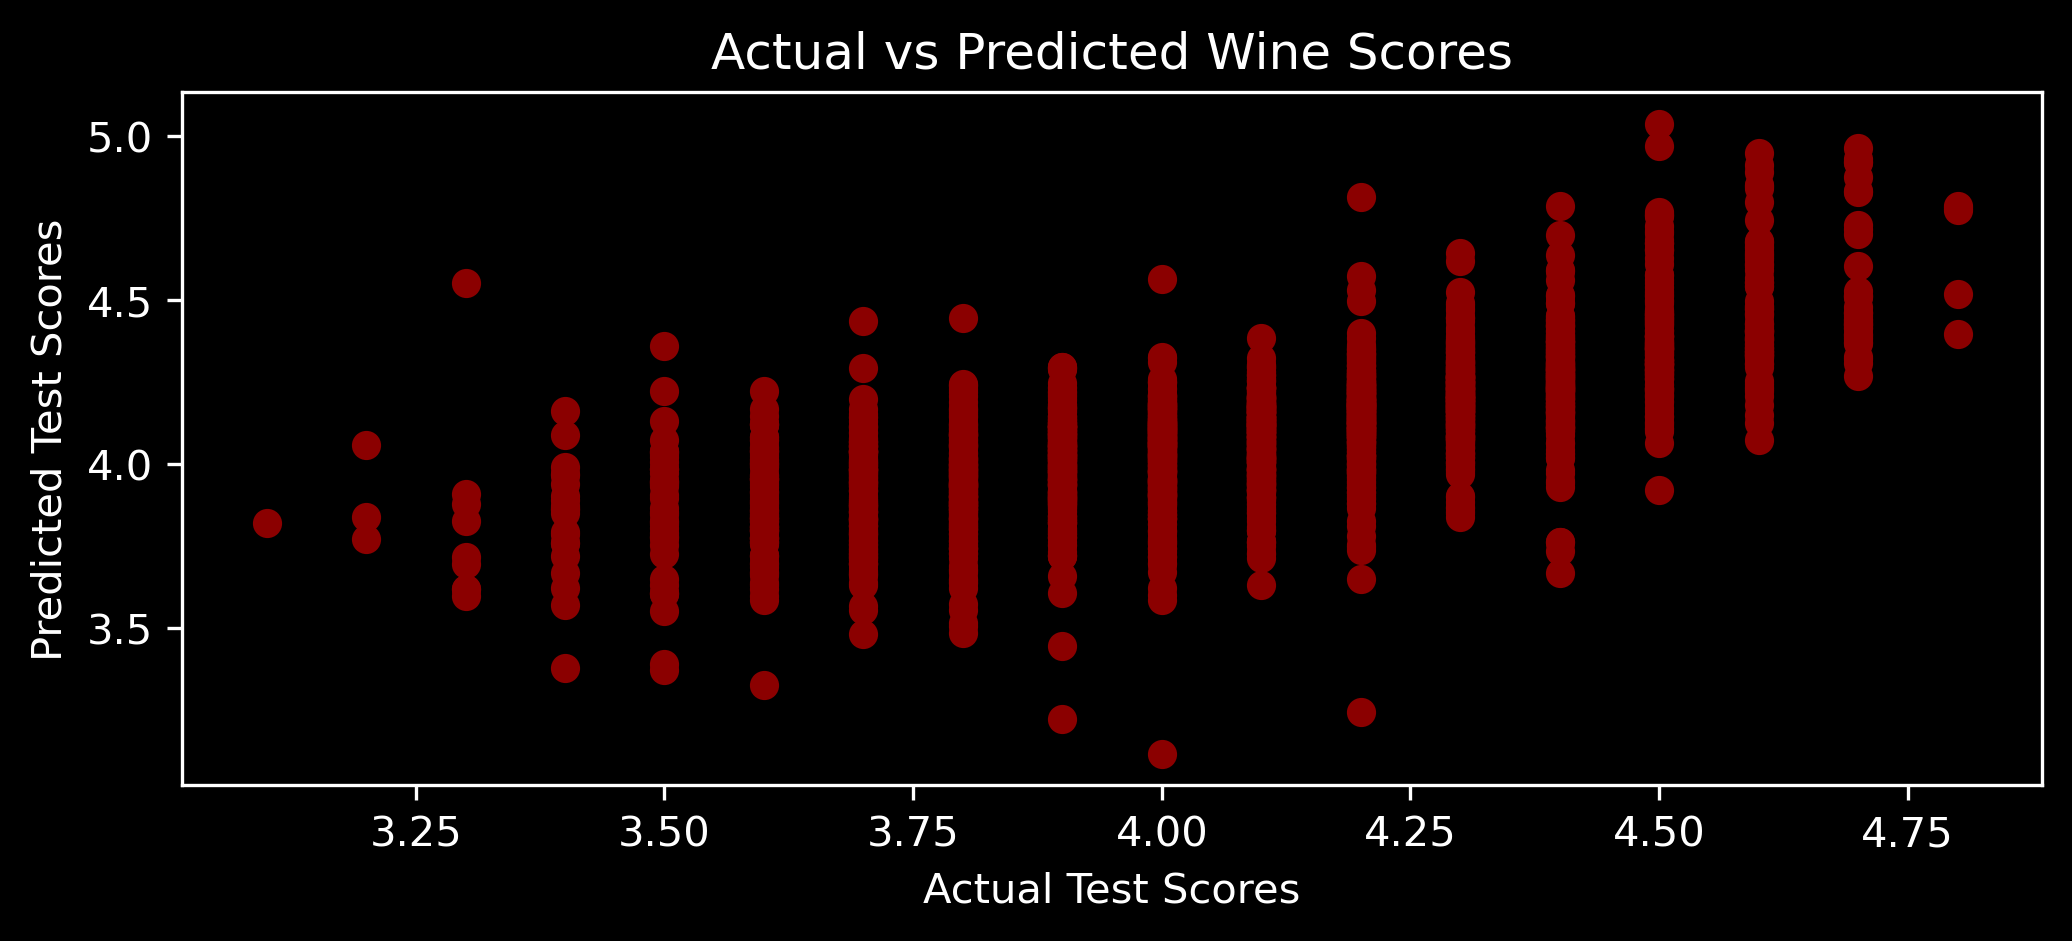

In [132]:
visualise_scores(fitted_grid4)

| Model | Parameter | Problem | R-squared Train | Avg. R-squared Validation | R-squared Test | RMSE Train | RMSE Test | MAE Train | MAE Test |
|:---------|--------:|---------:|---------:|---------:|--------:|---------:|---------:|--------:|---------:|
|  LinearRegression()  |  - |  Overfitting |  62.11%    |  -   |  0%  |  0.17  |  16692808.97   |  0.13  |  320460.88   |
|  GridSearch 1: Lasso   |  alpha=0.01, fit_intercept= True   |  Too many features   |  51.89%   |  51.10%   |  50.64%  |  0.19  |  0.19   |  0.15   |  0.15   |
|  GridSearch 2: Ridge   |  alpha=200, solver='svd', fit_intercept= True  |  alpha is at the end of the range   |  55.36%  |  54.368%   |  52.42%   |  0.18   |  0.19   |  0.14   |  0.14   |
|  GridSearch 3: Ridge   |  alpha=300, solver='svd', fit_intercept= True  |  -   |  55.35%  |  54.37%  |  52.44%  |  0.18   |  0.19   |  0.14   |  0.14   |
|  GridSearch 4: Ridge   |  No scaler, alpha=0.01, solver='svd', fit_intercept=True  |  -   |  55.21%  | 54.39%  |  52.44%   |  0.18   |  0.19   |  0.14   |  0.14   |


**Key Findings:**
- The grid search without a scaler and a ridge regression with an alpha of 0.01 resulted in the highest average cross-validation R-squared. Therefore, I am looking at the coefficient of this model too.

In [ ]:
# Putting coefficients inside a dataframe
coef = pd.DataFrame({'Feature_name' : X_train.columns, 
              'Beta_Coefficients' : fitted_grid4.best_estimator_.named_steps.model.coef_})

coef.sort_values(by='Beta_Coefficients').head(10)


,Feature_name,Beta_Coefficients
21,vegetal_green bell pepper,-3.699078
5,earth_earthy,-1.065883
19,black_fruit_blackcurrant,-0.913976
20,black_fruit_plum,-0.589708
29,microbio_cheese,-0.589420
4,group_tree_fruit,-0.496568
18,black_fruit_blackberry,-0.489513
39,Blue cheese,-0.282446
9,red_fruit_cherry,-0.196868
0,group_black_fruit,-0.178294


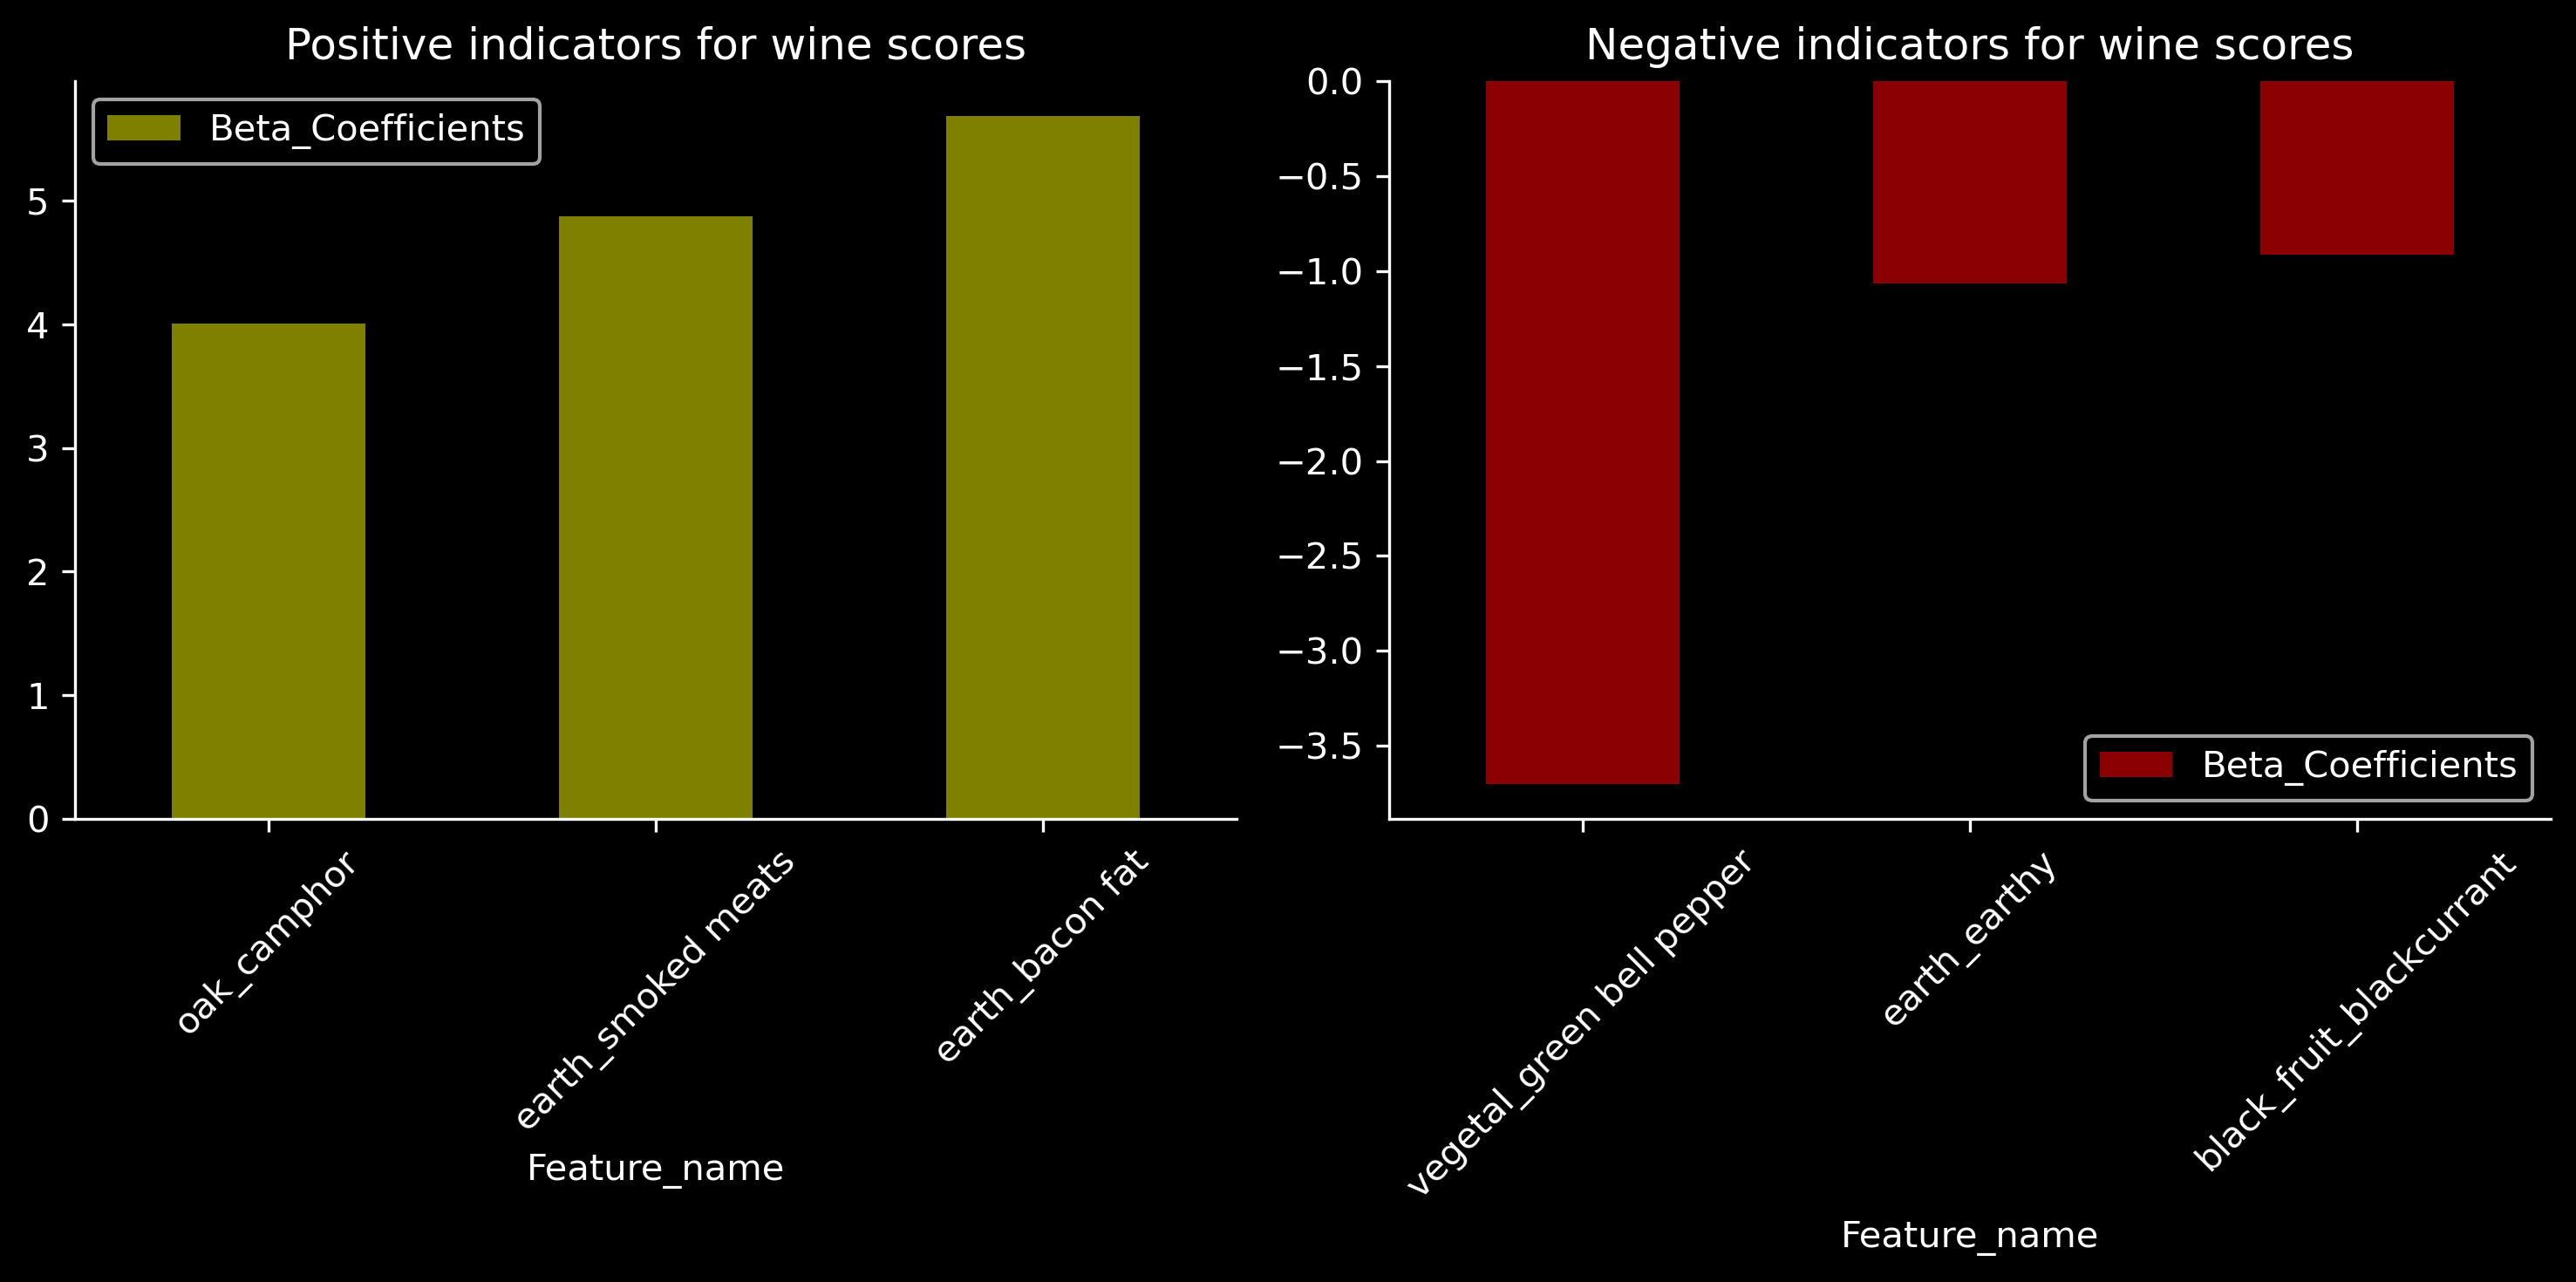

In [ ]:
# Plot positive and negative coefficients
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

# largest coefficient 
coef.sort_values(by='Beta_Coefficients').head(3).set_index("Feature_name").plot(kind="bar", rot=45, ax=axs[1], color="darkred")
axs[0].set_title("Positive indicators for wine scores")

# smallest coefficient 
coef.sort_values(by='Beta_Coefficients').tail(3).set_index("Feature_name").plot(kind="bar", rot=45, ax=axs[0], color="olive")
axs[1].set_title("Negative indicators for wine scores")

sns.despine()
plt.tight_layout()
plt.show()

**Key Findings:**
- As there is no scaler, only subflavors have the highest positive and negative coefficients since they are on the smallest scale. For interpretation purposes, it is better to look at the scaled coefficient to determine which features have the greatest influence. 

***

# Conclusion <a id="a3"></a>

The notebook includes a linear regression model for predicting wine scores. The ridge linear regression model with a standard scaler achieved the best results with an alpha of 300, an average cv R-squared of 54.37%, a test R-squared of 52.44%, an RMSE test of 0.19, and an MAE test of 0.14. The model's coefficients offer insights into positive and negative indicators of wine review scores. Positive indicators include price, and sweetness, while negative indicators include subflavors such as earthy, food features blue cheese and cured meat. However, the ridge linear regression without a scaler and an alpha of 0.01 achieved a slightly higher average cv R-squared of 54.39% and a test R-squared of 52.44%. It is important to note that the coefficients provide less insight in this case.

**Next Steps:**

- To further improve the wine score prediction, it could be possible to encode further categorical features like countries and regions. However, this project will go further with the wine score recommendation in the next notebook.